In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import matplotlib as mpl

In [2]:
df = pd.read_csv('data.csv', sep=',')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Nenhum valor nulo
# Diagnosis (M - Maligno, B - Beligno) Target

# 1 - Data Clean

In [3]:
# 1 - Colunas e dados
# 2 - Quantas amostras (linhas)
# 3 - Tipos de características (numéricas ou categóricas)
# 4 - Aparêcia de dados por características
# 5 - Dados Faltantes

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
id_counts = df.id.value_counts()
id_counts

842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: id, Length: 569, dtype: int64

In [6]:
duplicados = id_counts == 2 # Nenhum dado id duplicado
duplicados

842302     False
90250      False
901315     False
9013579    False
9013594    False
           ...  
873885     False
873843     False
873701     False
873593     False
92751      False
Name: id, Length: 569, dtype: bool

In [7]:
df.info() # apenas diagnosis categórico, coluna Unnamed: 32 excluir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.diagnosis.value_counts() #357 Belígnos, 212 malígnos

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
B = df[df.diagnosis == 'B']
M = df[df.diagnosis == 'M']

# Removendo colunas com pop

In [11]:
df.pop('Unnamed: 32');

In [12]:
df.pop('id');

In [13]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Label Encoder - transformar M e B em binário (0 e 1)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()


In [16]:
df.iloc[:,0] = le.fit_transform(df.iloc[:,0])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


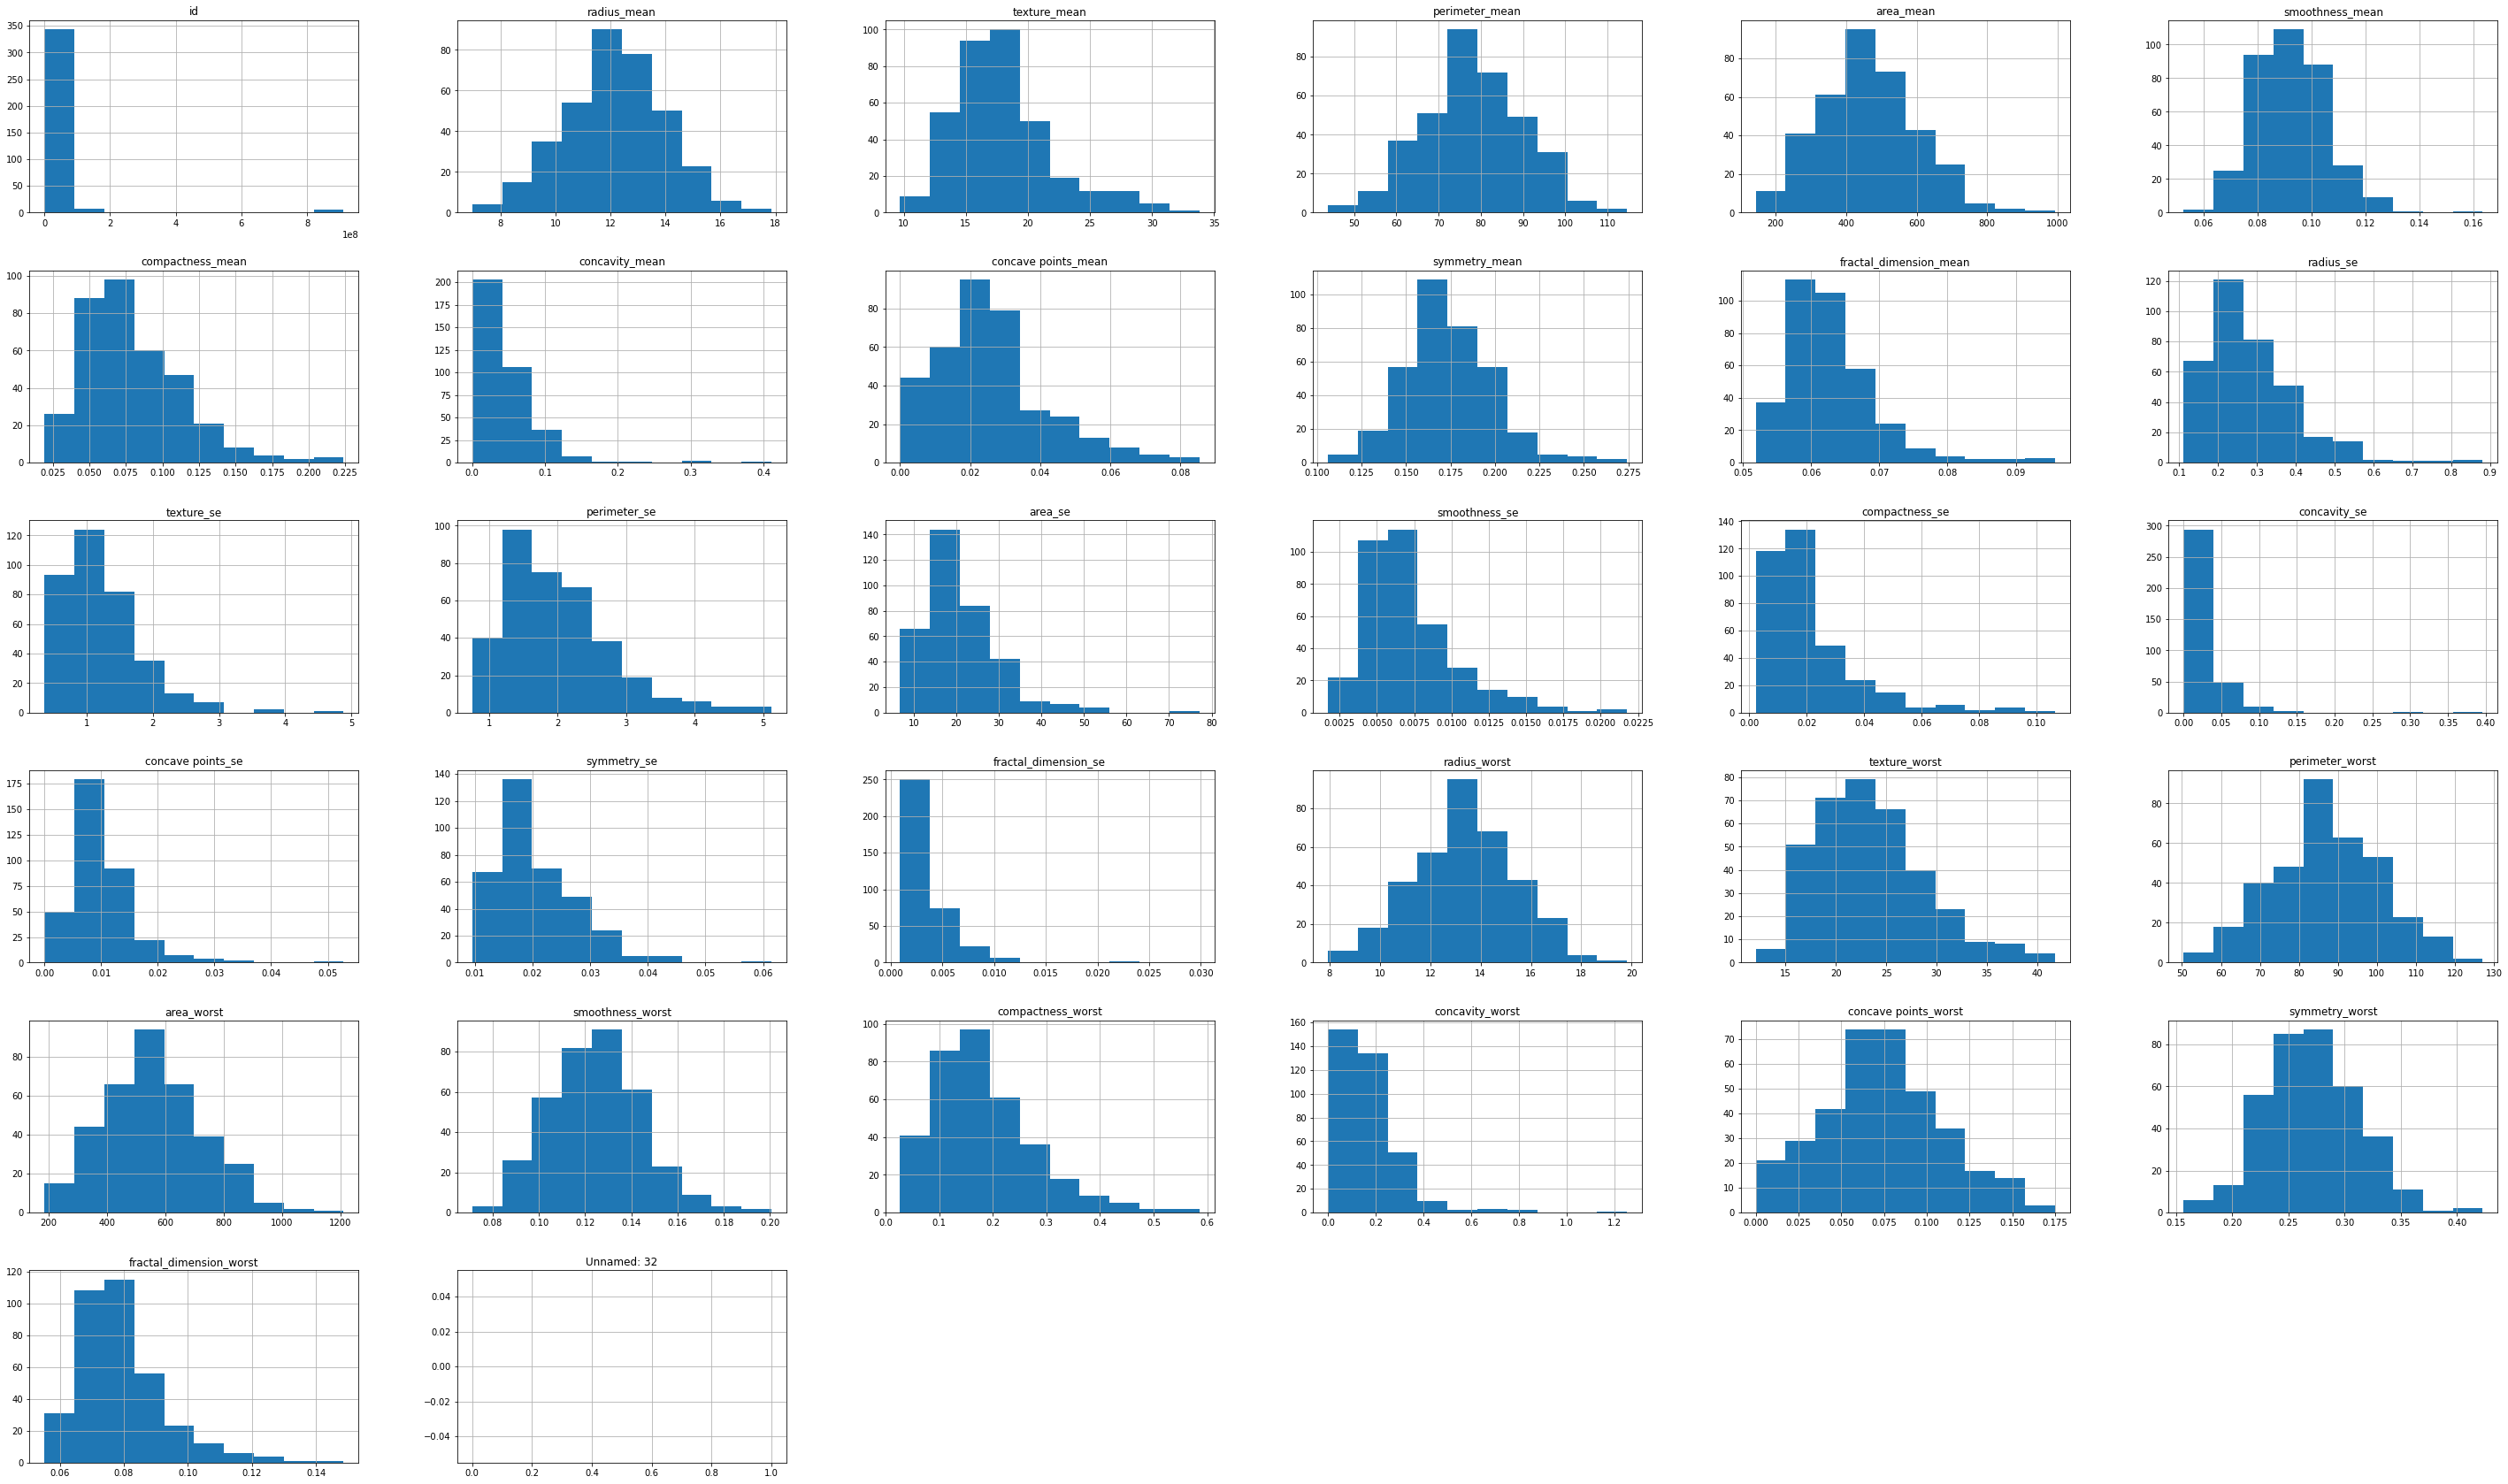

In [17]:

B.hist(figsize=(50,30));

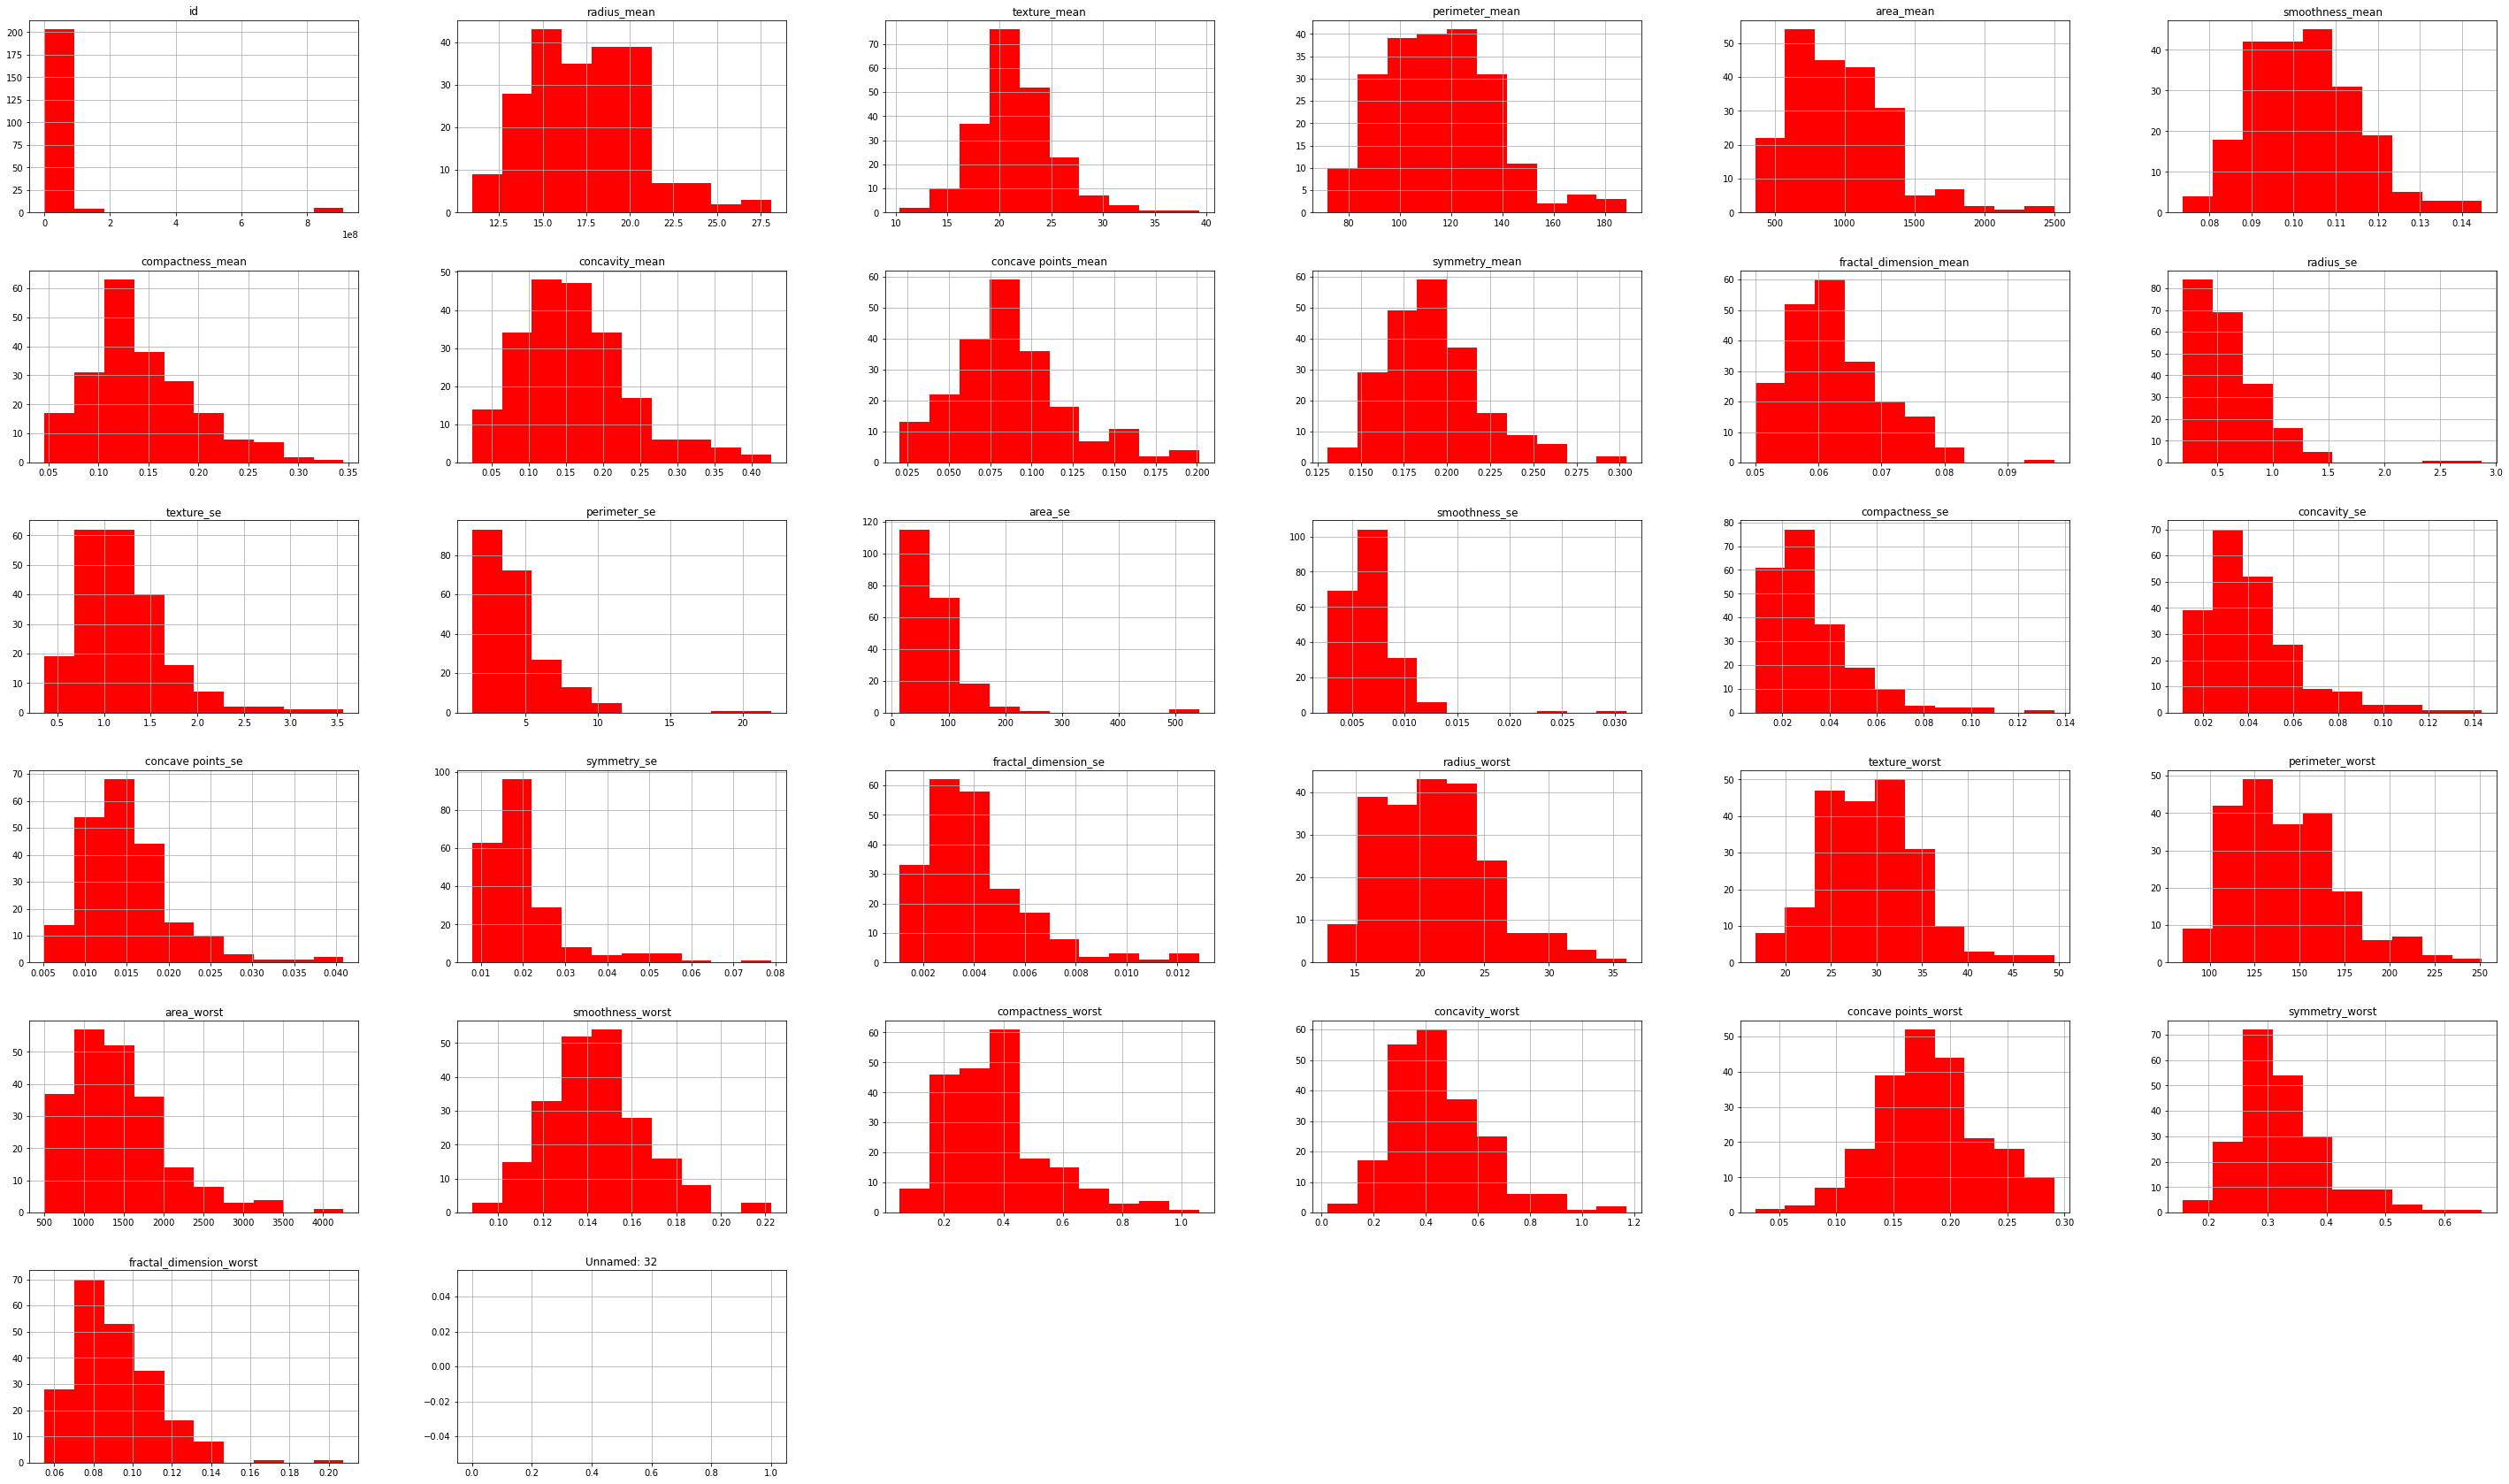

In [18]:
M.hist(figsize=(50,30),color='red');

 # Regressão Logística Simples (sem alterar características)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# Com todos hiperparâmetros no default

In [21]:
lr = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto',
                       n_jobs=None, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
# alterar hiperparâmetros posteriormente

In [23]:
lr.C = 2000
lr

LogisticRegression(C=2000, solver='liblinear')

# Teste e Treino

In [24]:
X_df = df.iloc[:,1:32].values
X_df

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [25]:
y_df = df.iloc[:,0].values # 1 - Maligno e 2 - Beligno
y_df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_df_treino, X_df_teste, y_df_treino, y_df_teste = train_test_split(X_df,y_df, test_size= 0.20, random_state=0, stratify=y_df) #stratify separa igualmente as médias do y para cada caso (treino e teste)

In [28]:
X_df_treino.shape, y_df_treino.shape

((455, 30), (455,))

In [29]:
np.mean(y_df_teste)

0.3684210526315789

In [30]:
np.mean(y_df_treino)

0.37362637362637363

In [31]:
lr.fit(X_df_treino, y_df_treino)

LogisticRegression(C=2000, solver='liblinear')

In [32]:
previsão = lr.predict(X_df_teste)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_df_teste, previsão)

0.9649122807017544

## ---------------------------  Aqui acaba o modelo simples --------------------------------------------------

# Utilizando Cross Validadtion - GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [37]:
# Usar df_X e df_y (ainda não dividídos)

# Vamos utilizar para ver os hiperparâmetros (melhores para cada modelo)

## Árvore de decisão

In [39]:
parametros = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
             'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]} # Dicionário de parâmetros

grid_search = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid = parametros)
grid_search.fit(X_df,y_df)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

## Random Forest

In [41]:
parametrosRF = {'criterion': ['gini', 'entropy'],
             'n_estimators': [10,20,40,100,150],
             'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,5,10]} # Dicionário de parâmetros

grid_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid = parametrosRF)
grid_search.fit(X_df,y_df)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

## KNeighborsClassifier

In [42]:
parametrosKN = {'n_neighbors': [3,5,10,20],
             'p': [1,2]} # Dicionário de parâmetros

grid_search = GridSearchCV(estimator= KNeighborsClassifier(), param_grid = parametrosKN)
grid_search.fit(X_df,y_df)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

## Regressão Logística

In [ ]:
parametrosRL = {'tol': [0.0001,0.00001,0.000001],
             'C': [1.0, 1.5, 2.0],
             'solver': ['lbfgs','sag','saga']} # Dicionário de parâmetros

grid_search = GridSearchCV(estimator= LogisticRegression(), param_grid = parametrosRL)
grid_search.fit(X_df,y_df)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

In [46]:
# {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
# 0.9420431609998448

## SVM

In [48]:
parametrosSVM = {'tol': [0.0001,0.00001,0.000001],
             'C': [1.0, 1.5, 2.0],
             'kernel': ['rbf','linear','poly','sigmoid']} # Dicionário de parâmetros

grid_search = GridSearchCV(estimator= SVC(), param_grid = parametrosSVM)
grid_search.fit(X_df,y_df)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

## Redes Neurais 

In [51]:
parametrosRN = {'activation': ['relu','logistic','tanh'],
             'solver': ['adam','sgd'],
             'batch_size': [10,56]} # Dicionário de parâmetros

grid_search = GridSearchCV(estimator= MLPClassifier(), param_grid = parametrosRN)
grid_search.fit(X_df,y_df)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

# Validação Cruzada

In [52]:
from sklearn.model_selection import cross_val_score, KFold

In [54]:
resultados_arvore = []

for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i) #random state de i - 0 a 30

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


## Usaremos o DecisionTreeClassifier

In [59]:
for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
                  
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_df, y_df, cv= kfold)
    print(scores)

0
[0.9122807  0.9122807  0.9122807  0.96491228 0.92982456 0.9122807
 0.96491228 0.92982456 0.94736842 0.94642857]
1
[0.94736842 0.92982456 0.9122807  0.96491228 0.84210526 0.92982456
 0.92982456 0.96491228 0.98245614 0.89285714]
2
[0.92982456 0.9122807  0.98245614 0.87719298 0.92982456 0.94736842
 0.9122807  0.89473684 0.89473684 0.92857143]
3
[0.9122807  0.92982456 0.98245614 0.96491228 0.94736842 0.92982456
 0.84210526 0.87719298 0.92982456 0.94642857]
4
[0.85964912 0.92982456 1.         0.96491228 0.92982456 0.98245614
 0.96491228 0.85964912 0.84210526 0.96428571]
5
[0.96491228 0.94736842 0.96491228 0.96491228 0.94736842 0.94736842
 0.89473684 0.94736842 1.         0.85714286]
6
[0.89473684 0.84210526 0.92982456 0.94736842 0.9122807  0.96491228
 0.9122807  0.98245614 0.9122807  0.96428571]
7
[1.         0.96491228 0.92982456 0.92982456 0.94736842 0.85964912
 0.92982456 0.85964912 0.92982456 0.96428571]
8
[0.96491228 0.92982456 0.9122807  0.98245614 0.9122807  0.98245614
 0.92982456 

### Oque foi feito acima: 30 vetores com 10 splits, 300 total - Utilizou varios pedaços da base para testar e treinar

In [61]:
## Agora vamos tirar a media de cada um desses vetores

In [62]:
for i in range(30):
    print(i)
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
                  
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, X_df, y_df, cv= kfold)
    print(scores.mean())

0
0.931484962406015
1
0.9332080200501254
2
0.9262218045112782
3
0.9315162907268169
4
0.926221804511278
5
0.9471804511278193
6
0.9315162907268169
7
0.9350563909774436
8
0.9420426065162907
9
0.9314536340852131
10
0.9437343358395991
11
0.9296052631578947
12
0.9384711779448622
13
0.92453007518797
14
0.9279761904761905
15
0.9244674185463658
16
0.9279761904761905
17
0.9420112781954886
18
0.9208959899749374
19
0.924436090225564
20
0.9297619047619046
21
0.9332080200501254
22
0.9296679197994988
23
0.9279135338345865
24
0.9209273182957395
25
0.9296992481203008
26
0.9279761904761905
27
0.9209586466165414
28
0.9173245614035087
29
0.9385025062656641


## Vamos colocar os  resultados dentro de uma lista 

In [66]:
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
                  
    arvore = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, splitter='random')
    scores = cross_val_score(arvore, X_df, y_df, cv= kfold)
    print(scores.mean())
    resultados_arvore.append(scores.mean())

0.9454573934837093
0.9192042606516291
0.9314536340852131
0.9261904761904762
0.9402882205513784
0.9313909774436091
0.9226503759398497
0.9157581453634085
0.9437969924812031
0.9296679197994988
0.9331453634085213
0.9402882205513784
0.9385651629072681
0.9331766917293234
0.931422305764411
0.9401629072681704
0.9436716791979949
0.9262218045112782
0.9384085213032582
0.9473057644110275
0.9192669172932331
0.9349937343358394
0.9472117794486217
0.924436090225564
0.9280075187969924
0.9526002506265666
0.92453007518797
0.9332080200501254
0.9296992481203008
0.9454573934837095


In [67]:
resultados_arvore

[0.9332393483709274,
 0.9349624060150376,
 0.924436090225564,
 0.9297305764411027,
 0.9227130325814537,
 0.9488721804511279,
 0.9315476190476192,
 0.931547619047619,
 0.9367794486215539,
 0.9279448621553884,
 0.9437343358395991,
 0.9418859649122806,
 0.9437343358395991,
 0.9210213032581454,
 0.9279761904761903,
 0.9209273182957393,
 0.9280075187969924,
 0.9367794486215537,
 0.9279448621553884,
 0.9243734335839597,
 0.9367481203007518,
 0.9384711779448622,
 0.9296052631578947,
 0.9279135338345865,
 0.9156641604010025,
 0.9226817042606517,
 0.9156641604010025,
 0.9280075187969924,
 0.9191416040100251,
 0.9350250626566415,
 0.9454573934837093,
 0.9192042606516291,
 0.9314536340852131,
 0.9261904761904762,
 0.9402882205513784,
 0.9313909774436091,
 0.9226503759398497,
 0.9157581453634085,
 0.9437969924812031,
 0.9296679197994988,
 0.9331453634085213,
 0.9402882205513784,
 0.9385651629072681,
 0.9331766917293234,
 0.931422305764411,
 0.9401629072681704,
 0.9436716791979949,
 0.9262218045112

# Vamos fazer para todos outros algorítimos:

In [69]:
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []
# Vamos utilizar os valores encontrados anteriormente
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
                  
    arvore = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, splitter='random')
    scores = cross_val_score(arvore, X_df, y_df, cv= kfold)
    resultados_arvore.append(scores.mean())
    
    random_forest = RandomForestClassifier(criterion='entropy',min_samples_leaf= 1, min_samples_split= 10, n_estimators= 40 )
    scores = cross_val_score(random_forest, X_df, y_df, cv= kfold)
    resultados_random_forest.append(scores.mean())
    
    knn = KNeighborsClassifier(n_neighbors = 10, p = 1)
    scores = cross_val_score(knn, X_df, y_df, cv=kfold)
    resultados_knn.append(scores.mean())
    
    logistica = LogisticRegression(C=1.0, solver ='lbfgs', tol = 0.0001)
    scores = cross_val_score(logistica, X_df, y_df, cv=kfold)
    resultados_logistica.append(scores.mean())
    
    svm = SVC(C=2.0, kernel = 'linear', tol= 0.0001)
    scores = cross_val_score(svm, X_df, y_df, cv=kfold)
    resultados_svm.append(scores.mean())
    
    rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam' )
    scores = cross_val_score(rede_neural, X_df, y_df, cv=kfold)
    resultados_rede_neural.append(scores.mean())
    
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [97]:
resultado_arvore_1 = []
i=0
 
for element in resultados_arvore:
    if i< 30:
        resultado_arvore_1.append(element)
        i = i + 1

print(resultado_arvore_1)

[0.9332393483709274, 0.9349624060150376, 0.924436090225564, 0.9297305764411027, 0.9227130325814537, 0.9488721804511279, 0.9315476190476192, 0.931547619047619, 0.9367794486215539, 0.9279448621553884, 0.9437343358395991, 0.9418859649122806, 0.9437343358395991, 0.9210213032581454, 0.9279761904761903, 0.9209273182957393, 0.9280075187969924, 0.9367794486215537, 0.9279448621553884, 0.9243734335839597, 0.9367481203007518, 0.9384711779448622, 0.9296052631578947, 0.9279135338345865, 0.9156641604010025, 0.9226817042606517, 0.9156641604010025, 0.9280075187969924, 0.9191416040100251, 0.9350250626566415]


In [98]:
len(resultado_arvore_1)

30

In [71]:
# Média - soma de todos dividido pelo numero de amostra
# Variância - somatório do valor menos a média ao quadrado, tudo isso dividido pelo numero de amostras (o quão longe estão os valores da média?)
# Desvio padrão - raiz da variância


## Análise dos resultados

In [100]:
resultados = pd.DataFrame({'Arvore': resultado_arvore_1, 'Random Forest': resultados_random_forest,  'KNN': resultados_knn,
                          'Reg Logística': resultados_logistica, 'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})
resultados

,Arvore,Random Forest,KNN,Reg Logística,SVM,Rede Neural
0,0.933239,0.956078,0.941917,0.954323,0.961310,0.894392
1,0.934962,0.954261,0.936654,0.945520,0.954292,0.931360
2,0.924436,0.964850,0.935025,0.942011,0.957801,0.897964
3,0.929731,0.964850,0.940288,0.949029,0.956078,0.919236
4,0.922713,0.959524,0.934994,0.942011,0.952569,0.910495
5,0.948872,0.959430,0.932989,0.940132,0.952412,0.917168
6,0.931548,0.963158,0.942011,0.947306,0.947306,0.905107
7,0.931548,0.963127,0.934994,0.949029,0.947306,0.926222
8,0.936779,0.956015,0.940226,0.938409,0.950783,0.867794
9,0.927945,0.957895,0.938596,0.945551,0.954261,0.906830


In [102]:
resultados.describe() #Todas estatísticas

,Arvore,Random Forest,KNN,Reg Logística,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.930236,0.959690,0.936734,0.944521,0.953309,0.912624
std,0.008374,0.004105,0.003214,0.004855,0.003220,0.015879
min,0.915664,0.952475,0.931516,0.929574,0.947306,0.867794
25%,0.924389,0.956493,0.934994,0.942011,0.951237,0.905107
50%,0.928806,0.959555,0.935808,0.945536,0.952600,0.916400
75%,0.936317,0.963111,0.938581,0.947306,0.955639,0.924029
max,0.948872,0.968327,0.943640,0.954323,0.961310,0.938503


In [103]:
resultados.var() #Variância

Arvore           0.000070
Random Forest    0.000017
KNN              0.000010
Reg Logística    0.000024
SVM              0.000010
Rede Neural      0.000252
dtype: float64

In [104]:
(resultados.std()/ resultados.mean())*100 # Coeficiente de variação em porcentagem

Arvore           0.900206
Random Forest    0.427750
KNN              0.343123
Reg Logística    0.513967
SVM              0.337818
Rede Neural      1.739882
dtype: float64

# Teste de Normalidade - Distribuição Normal

In [105]:
alpha = 0.5 #teste de hipóteses 95% de segurança

In [106]:
from scipy.stats import shapiro

In [107]:
shapiro(resultado_arvore_1),shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica),shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9773328900337219, pvalue=0.7510828375816345),
 ShapiroResult(statistic=0.9749162793159485, pvalue=0.6802619695663452),
 ShapiroResult(statistic=0.9480762481689453, pvalue=0.1501132696866989),
 ShapiroResult(statistic=0.9339502453804016, pvalue=0.06257562339305878),
 ShapiroResult(statistic=0.9662660360336304, pvalue=0.4426702857017517),
 ShapiroResult(statistic=0.9575138688087463, pvalue=0.2672443985939026))

In [108]:
# Se o valor de p=< que alpha indica que os dados não são normais 

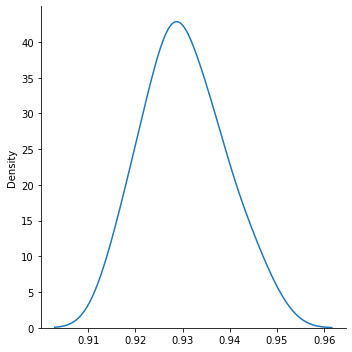

In [117]:
sns.displot(resultado_arvore_1,kind= 'kde' );

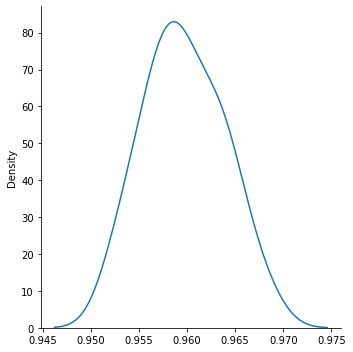

In [118]:
sns.displot(resultados_random_forest,kind= 'kde' );

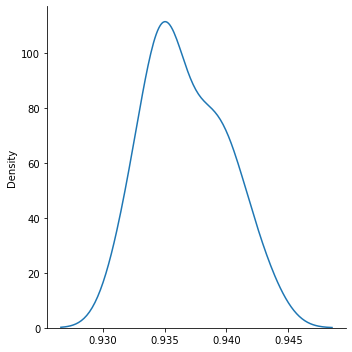

In [119]:
sns.displot(resultados_knn,kind= 'kde' );

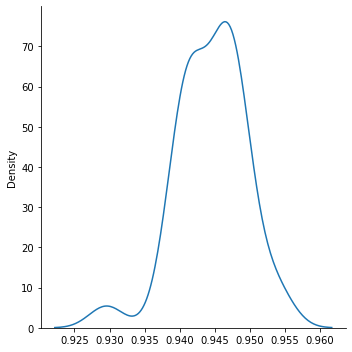

In [120]:
sns.displot(resultados_logistica,kind= 'kde' );

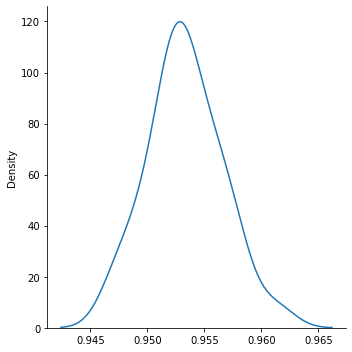

In [121]:
sns.displot(resultados_svm,kind= 'kde' );

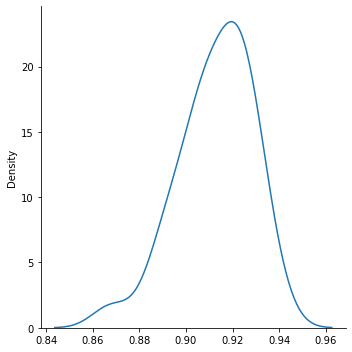

In [123]:
sns.displot(resultados_rede_neural ,kind= 'kde' );

# ANOVA - comparativo de amostras (amostras independentes)

In [124]:
# SÓ PODE SER USADO EM DISTRIBUIÇÃO NORMAL

In [125]:
from scipy.stats import f_oneway

In [130]:
_, p = f_oneway(resultado_arvore_1,resultados_random_forest,resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural ) #uderline virgula p - pois queremos o segundo valor (a função retona dois valores)
p

5.318020923238177e-58

In [131]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes ')
else:
    print('Hipótese alternativa rejeitada. Dados são iguais ')

Hipótese nula rejeitada. Dados são diferentes 


In [132]:
# Se os dados fossem iguais, poderíamos utilizar qualquer modelo..

In [133]:
resultados_algorítimos = {'accuracy': np.concatenate([resultado_arvore_1,resultados_random_forest,resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                          'algoritimo':['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                           'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                           'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis', 'logis',
                            'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                            'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']}

In [135]:
resultados_df = pd.DataFrame(resultados_algorítimos)
resultados_df

,accuracy,algoritimo
0,0.933239,arvore
1,0.934962,arvore
2,0.924436,arvore
3,0.929731,arvore
4,0.922713,arvore
...,...,...
175,0.892826,rede_neural
176,0.917481,rede_neural
177,0.908678,rede_neural
178,0.903352,rede_neural


In [136]:
from statsmodels.stats.multicomp import MultiComparison

In [137]:
comp_algoritimo = MultiComparison(resultados_df['accuracy'], resultados_df['algoritimo'])

In [141]:
teste_estatistico = comp_algoritimo.tukeyhsd()

In [142]:
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   0.0065 0.0234  0.0005  0.0124   True
       arvore         logis   0.0143  0.001  0.0083  0.0202   True
       arvore random_forest   0.0295  0.001  0.0235  0.0354   True
       arvore   rede_neural  -0.0176  0.001 -0.0236 -0.0117   True
       arvore           svm   0.0231  0.001  0.0171   0.029   True
          knn         logis   0.0078  0.003  0.0018  0.0137   True
          knn random_forest    0.023  0.001   0.017  0.0289   True
          knn   rede_neural  -0.0241  0.001 -0.0301 -0.0182   True
          knn           svm   0.0166  0.001  0.0106  0.0225   True
        logis random_forest   0.0152  0.001  0.0092  0.0211   True
        logis   rede_neural  -0.0319  0.001 -0.0378 -0.0259   True
        logis           svm   0.0088  0.001  0.0028  0.0147   

## Se tivessemos algum false, poderiamos utilizar tanto um quanto outro algoritimo

In [143]:
resultados.mean()

Arvore           0.930236
Random Forest    0.959690
KNN              0.936734
Reg Logística    0.944521
SVM              0.953309
Rede Neural      0.912624
dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


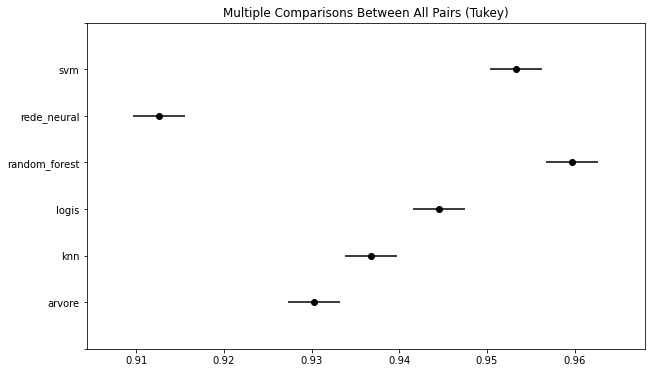

In [147]:
teste_estatistico.plot_simultaneous();

# Utilizar os três melhores -----------------------------------------------

In [149]:
classificador_random_forest =  RandomForestClassifier(criterion='entropy',min_samples_leaf= 1, min_samples_split= 10, n_estimators= 40)
classificador_random_forest.fit(X_df,y_df)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=40)

In [193]:
classificador_svm = SVC(C=2.0, kernel = 'linear', tol= 0.0001, probability=True)
classificador_svm.fit(X_df,y_df)

SVC(C=2.0, kernel='linear', probability=True, tol=0.0001)

In [152]:
classificador_knn = KNeighborsClassifier(n_neighbors = 10, p = 1)
classificador_knn.fit(X_df,y_df)

KNeighborsClassifier(n_neighbors=10, p=1)

# Salvar os classificadores no PICKLE

In [194]:
import pickle
pickle.dump(classificador_random_forest,open('random_forest.sav', 'wb'))
pickle.dump(classificador_svm,open('svm.sav', 'wb'))
pickle.dump(classificador_knn,open('knn.sav', 'wb'))

In [156]:
# Agora podemos utilizar os modelos treinados, vamos abrir outro notebook para testar


# Abrindo os arquivos e simulando um registro - pode ser usado em produção

In [195]:
rf = pickle.load(open('random_forest.sav', 'rb'))
svm = pickle.load(open('svm.sav', 'rb'))
knn = pickle.load(open('knn.sav', 'rb'))

In [175]:
registro = X_df[0]

In [176]:
registro

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [177]:
registro = registro.reshape(1,-1) #utilizamos o reshape para transformar o array em uma linha e 30 colunas 
registro.shape

(1, 30)

In [178]:
rf.predict(registro)

array([1])

In [179]:
svm.predict(registro)

array([1])

In [180]:
knn.predict(registro)

array([1])

# Combinação de Classificadores

In [184]:
# Vamnos usar as 3 respostas dos 3 melhores modelos, caso alguma de diferente, valerá a com maior contagem.


Beligno = 0
Maligno = 1


In [185]:
resposta_rf = rf.predict(registro)
resposta_svm = svm.predict(registro)
resposta_knn = knn.predict(registro)

In [186]:
if resposta_rf[0] == 1:
    Maligno += 1
else:
    Beligno += 1

if resposta_svm[0] == 1:
    Maligno += 1
else:
    Beligno += 1
    
if resposta_knn[0] == 1:
    Maligno += 1
else:
    Beligno += 1
    
if Beligno > Maligno:
    print('Câncer Beligno')
else:
    print('Câncer Maligno')

Câncer Maligno


# Regeição de Classificadores (apenas com alguma % de certeza)

In [187]:
probabilidade_rf = rf.predict_proba(registro)
probabilidade_rf

array([[0.02905983, 0.97094017]])

In [190]:
confianca_rf = probabilidade_rf.max()
confianca_rf

0.970940170940171

In [196]:
probabilidade_svm = svm.predict_proba(registro)   # Deu erro! temos que alterar no parâmetro do modelo para probalbility=True
probabilidade_svm

array([[3.0000009e-14, 1.0000000e+00]])

In [197]:
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999999999999699

In [198]:
probabilidade_knn = knn.predict_proba(registro)
probabilidade_knn

array([[0., 1.]])

In [199]:
confianca_knn = probabilidade_knn.max()
confianca_knn

1.0

## Podemos gerar um código parecido com o anterior, porem adicionando uma porcentagem de confiança:


In [201]:
Beligno = 0
Maligno = 1
confiança_min = 0.98
algoritimos = 0

if confianca_rf >= confiança_min:
    algoritimos += 1
    if resposta_rf[0] == 1:
        Maligno += 1
    else:
        Beligno += 1

if confianca_svm >= confiança_min:
    algoritimos += 1        
    if resposta_svm[0] == 1:
        Maligno += 1
    else:
        Beligno += 1

if confianca_knn >= confiança_min:
    algoritimos += 1        
    if resposta_knn[0] == 1:
        Maligno += 1
    else:
        Beligno += 1
    
if Beligno > Maligno:
    print('Câncer Beligno, baseado em {} algoritimos'.format(algoritimos))
else:
    print('Câncer Maligno, , baseado em {} algoritimos'.format(algoritimos))

Câncer Maligno, , baseado em 2 algoritimos


In [202]:
# No exemplo a cima, colocamos uma porcentagem de confiança de 98% podemos ver que apenas 2 algorítimos foram utilizados